In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


In [2]:
def system_of_eqs(t, y, Tp_a, Te_a, gamma, V, alpha_S, alpha_T, tau, Fp, Fe):
    # Unpack the variables
    Tp, Te, Sp, Se = y
    
    # Compute the flux term
    flux = gamma*(alpha_S * (Sp - Se) - alpha_T * (Tp - Te))
    
    # Differential equations
    dTp_dt = - (abs(flux) / V)  * (Tp - Te) + (1 / tau) * (Tp_a - Tp)
    dTe_dt = (abs(flux) / V)  * (Tp - Te) + (1 / tau) * (Te_a - Te)
    dSp_dt = - (abs(flux) / V)  * (Sp - Se) + Fp
    dSe_dt = (abs(flux) / V)  * (Sp - Se) + Fe
    
    return [dTp_dt, dTe_dt, dSp_dt, dSe_dt]



In [3]:
# Constants
alpha_T = 0.12  # kg m^(-3) °C^(-1)
alpha_S = 0.79  # kg m^(-3) ppt^(-1)
gamma = 2.8e7   # m^6 kg^(-1) s^(-1)
tau = 1.32e9    # s
Te_a = 28.0     # °C
Tp_a = 7.0      # °C 
V = 0.4e17      # m^3
Fp = -3e-10     # ppt s^(-1)
Fe = 3e-10      # ppt s^(-1)


# Initial conditions
y0 = [10, 26, 34, 36]


# (source: google unit converter)
year_in_days = 365
day_in_seconds = 86400
nb_years = 500

# Time span
time_span = (0, nb_years * year_in_days * day_in_seconds)  # 500 years in seconds
time_eval = np.arange(0, time_span[1], day_in_seconds)  # Daily timesteps

# Solve for Case 1
sol_case1 = solve_ivp(system_of_eqs, time_span, y0, t_eval=time_eval,
                      args=(Tp_a, Te_a, gamma, V, alpha_S, alpha_T, tau, Fp, Fe), method='RK45')



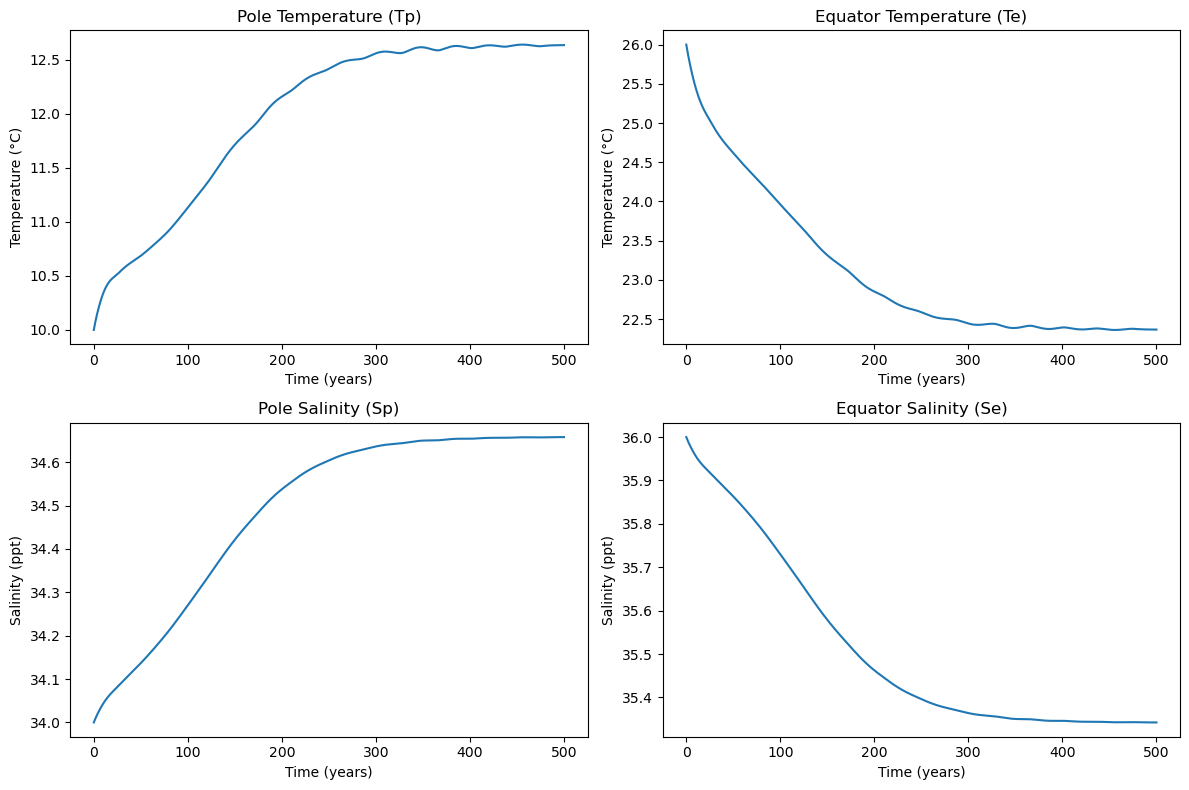

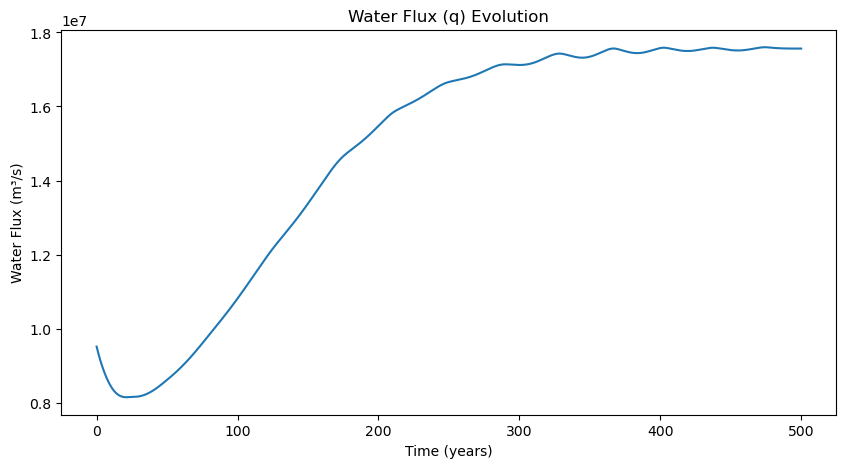

In [12]:
Tp1, Te1, Sp1, Se1 = sol_case1.y
# Plot temperatures and salinities
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(time_eval / (year_in_days * day_in_seconds), Tp1, label="Case 1: no climate change (Tp)")
plt.title("Pole Temperature (Tp)")
plt.xlabel("Time (years)")
plt.ylabel("Temperature (°C)")
# plt.legend()

plt.subplot(2, 2, 2)
plt.plot(time_eval / (year_in_days * day_in_seconds), Te1, label="Case 1: no climate change (Te)")
plt.title("Equator Temperature (Te)")
plt.xlabel("Time (years)")
plt.ylabel("Temperature (°C)")
# plt.legend()

plt.subplot(2, 2, 3)
plt.plot(time_eval / (year_in_days * day_in_seconds), Sp1, label="Case 1: no climate change  (Sp)")
plt.title("Pole Salinity (Sp)")
plt.xlabel("Time (years)")
plt.ylabel("Salinity (ppt)")
# plt.legend()

plt.subplot(2, 2, 4)
plt.plot(time_eval / (year_in_days * day_in_seconds), Se1, label="Case 1: no climate change (Se)")
plt.title("Equator Salinity (Se)")
plt.xlabel("Time (years)")
plt.ylabel("Salinity (ppt)")
# plt.legend()

plt.tight_layout()
plt.show()

# Plot water flux q (example q = Tp - Te)
q1 = gamma*(alpha_S*(Sp1-Se1)-alpha_T*(Tp1 - Te1))

plt.figure(figsize=(10, 5))
plt.plot(time_eval / (year_in_days * day_in_seconds), q1, label="Case 1: no climate change (q)")
plt.title("Water Flux (q) Evolution")
plt.xlabel("Time (years)")
plt.ylabel("Water Flux (m³/s)")
# plt.legend()
plt.show()


In [5]:
Tp_a_case2 = 9.0  # °C (Case 2, climate change scenario)
sol_case2 = solve_ivp(system_of_eqs, time_span, y0, t_eval=time_eval,
                      args=(Tp_a_case2, Te_a, gamma, V, alpha_S, alpha_T, tau, Fp, Fe), method='RK45')


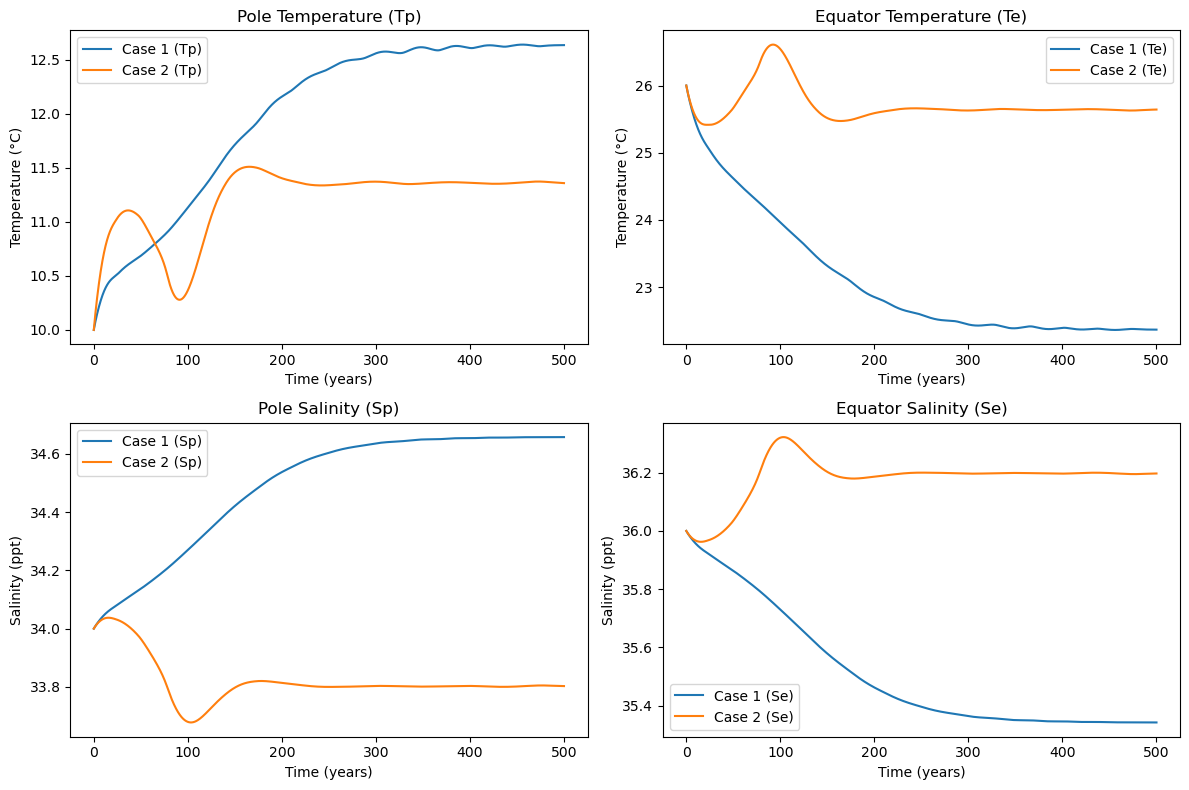

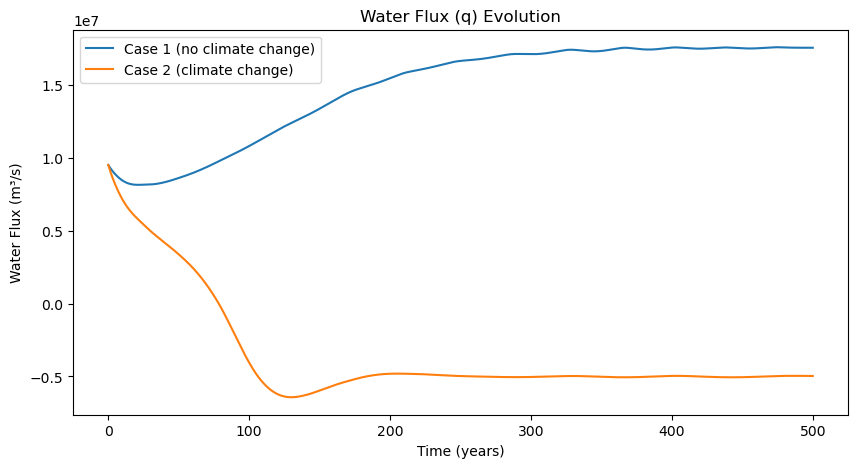

In [11]:


# Extract results
Tp2, Te2, Sp2, Se2 = sol_case2.y

# Plot temperatures and salinities
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)plt.plot(time_eval / (year_in_days * day_in_seconds), Tp1, label="Case 1 (Tp)")
plt.plot(time_eval / (year_in_days * day_in_seconds), Tp2, label="Case 2 (Tp)")
plt.title("Pole Temperature (Tp)")
plt.xlabel("Time (years)")
plt.ylabel("Temperature (°C)")
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(time_eval / (year_in_days * day_in_seconds), Te1, label="Case 1 (Te)")
plt.plot(time_eval / (year_in_days * day_in_seconds), Te2, label="Case 2 (Te)")
plt.title("Equator Temperature (Te)")
plt.xlabel("Time (years)")
plt.ylabel("Temperature (°C)")
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(time_eval / (year_in_days * day_in_seconds), Sp1, label="Case 1 (Sp)")
plt.plot(time_eval / (year_in_days * day_in_seconds), Sp2, label="Case 2 (Sp)")
plt.title("Pole Salinity (Sp)")
plt.xlabel("Time (years)")
plt.ylabel("Salinity (ppt)")
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(time_eval / (year_in_days * day_in_seconds), Se1, label="Case 1 (Se)")
plt.plot(time_eval / (year_in_days * day_in_seconds), Se2, label="Case 2 (Se)")
plt.title("Equator Salinity (Se)")
plt.xlabel("Time (years)")
plt.ylabel("Salinity (ppt)")
plt.legend()

plt.tight_layout()
plt.show()

# Plot water flux q (example q = Tp - Te)
q1 = gamma*(alpha_S*(Sp1-Se1)-alpha_T*(Tp1 - Te1))
q2 = gamma*(alpha_S*(Sp2-Se2)-alpha_T*(Tp2 - Te2))

plt.figure(figsize=(10, 5))
plt.plot(time_eval / (year_in_days * day_in_seconds), q1, label="Case 1 (no climate change)")
plt.plot(time_eval / (year_in_days * day_in_seconds), q2, label="Case 2 (climate change)")
plt.title("Water Flux (q) Evolution")
plt.xlabel("Time (years)")
plt.ylabel("Water Flux (m³/s)")
plt.legend()
plt.show()
